In [1]:
import sys
from pathlib import Path

# ROOT = folder DPFCALC (jeden poziom wyżej niż notebooks)
ROOT = Path("..").resolve()
sys.path.append(str(ROOT))

print("ROOT:", ROOT)

from src.dpf_model import (
    DPFInputs,
    simulate_vehicle_lifecycle,
    UsageProfile,
    load_oils_csv,
    load_fuels_csv,
    calc_dpf_ash_fill,
)
import matplotlib.pyplot as plt


ROOT: C:\Users\tucyk\Desktop\CV PORTFOLIO\DPFCALC


In [2]:
profile_city = DPFInputs(
    mileage_km=0.0,
    avg_speed_kmh=30.0,
    city_ratio=0.9,
    oil_ash_content_pct=1.2,
    fuel_sulfur_ppm=50.0,
    regen_interval_km=350.0,
)

profile_mixed = DPFInputs(
    mileage_km=0.0,
    avg_speed_kmh=60.0,
    city_ratio=0.4,
    oil_ash_content_pct=1.0,
    fuel_sulfur_ppm=10.0,
    regen_interval_km=450.0,
)


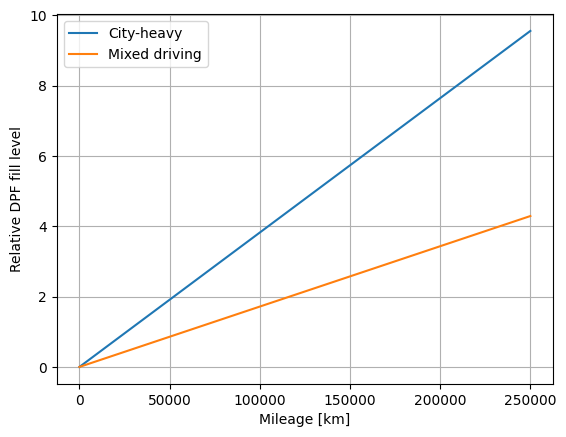

In [3]:
df_city = simulate_vehicle_lifecycle(profile_city, max_mileage_km=250_000, step_km=5_000)
df_mixed = simulate_vehicle_lifecycle(profile_mixed, max_mileage_km=250_000, step_km=5_000)

plt.figure()
plt.plot(df_city["mileage_km"], df_city["total_ratio"], label="City-heavy")
plt.plot(df_mixed["mileage_km"], df_mixed["total_ratio"], label="Mixed driving")
plt.xlabel("Mileage [km]")
plt.ylabel("Relative DPF fill level")
plt.legend()
plt.grid(True)
plt.show()


In [4]:
from src.dpf_model import (
    UsageProfile,
    load_oils_csv,
    load_fuels_csv,
    calc_dpf_ash_fill,
)

oils = load_oils_csv()
fuels = load_fuels_csv()

profile = UsageProfile(
    mileage_km=180_000,
    oil_consumption_l_per_1000km=0.3,
    fuel_consumption_l_per_100km=7.0,
)

result = calc_dpf_ash_fill(
    profile=profile,
    oil=oils["OIL_C3_5W30_GENERIC"],
    fuel=fuels["FUEL_EURO6_ON"],
    dpf_capacity_ash_g=120.0,
)

result


{'oil_ash_g': 367.2,
 'fuel_ash_g': 315.62999999999994,
 'total_ash_g': 682.8299999999999,
 'dpf_capacity_ash_g': 120.0,
 'fill_ratio': 5.69025,
 'fill_percent': 569.025}

In [5]:
from src.dpf_model import (
    UsageProfile,
    load_oils_csv,
    load_fuels_csv,
    calc_dpf_ash_fill,
)

oils = load_oils_csv()
fuels = load_fuels_csv()

profile = UsageProfile(
    mileage_km=180_000,
    oil_consumption_l_per_1000km=0.3,
    fuel_consumption_l_per_100km=7.0,
)

result = calc_dpf_ash_fill(
    profile=profile,
    oil=oils["OIL_C3_5W30_GENERIC"],
    fuel=fuels["FUEL_EURO6_ON"],
    dpf_capacity_ash_g=120.0,
)

result


{'oil_ash_g': 367.2,
 'fuel_ash_g': 315.62999999999994,
 'total_ash_g': 682.8299999999999,
 'dpf_capacity_ash_g': 120.0,
 'fill_ratio': 5.69025,
 'fill_percent': 569.025}